# Load Libraries 

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Load Dataset
### link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [148]:
df_train = pd.read_csv('Dataset/HousePriceDataset/train.csv')
df_test = pd.read_csv('Dataset/HousePriceDataset/test.csv')

In [149]:
df_train.shape,  df_test.shape

((1460, 81), (1460, 81))

In [152]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [154]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Know your Data

# Data Integration

In [158]:
df = pd.concat([df_train, df_test])
df.shape

(2920, 81)

# Get the brief information of dataset


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2920 non-null   int64  
 1   MSSubClass     2920 non-null   int64  
 2   MSZoning       2920 non-null   object 
 3   LotFrontage    2402 non-null   float64
 4   LotArea        2920 non-null   int64  
 5   Street         2920 non-null   object 
 6   Alley          182 non-null    object 
 7   LotShape       2920 non-null   object 
 8   LandContour    2920 non-null   object 
 9   Utilities      2920 non-null   object 
 10  LotConfig      2920 non-null   object 
 11  LandSlope      2920 non-null   object 
 12  Neighborhood   2920 non-null   object 
 13  Condition1     2920 non-null   object 
 14  Condition2     2920 non-null   object 
 15  BldgType       2920 non-null   object 
 16  HouseStyle     2920 non-null   object 
 17  OverallQual    2920 non-null   int64  
 18  OverallCond  

In [163]:
# getting all the integer columns
int_features = df.select_dtypes(include=["int64"]).columns
int_features

# getting all the floating columns
float_features = df.select_dtypes(include=["float64"]).columns
float_features

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [165]:
# getting all categorical (sting/object) columns
cate_features = df.select_dtypes(include=["object"]).columns
cate_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Get statistical information of Numerical Features

In [168]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2920.000000,2920.000000,2402.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2904.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.537785,42.293325,24.279694,9979.555080,1.382760,1.112609,30.197730,20.641870,181.035018,456.019958,...,125.317323,66.244678,61.108679,29.312308,55.747864,40.170424,496.038036,2.703163,1.327868,79428.893889
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Handle Missing Values

## Visualize missing values

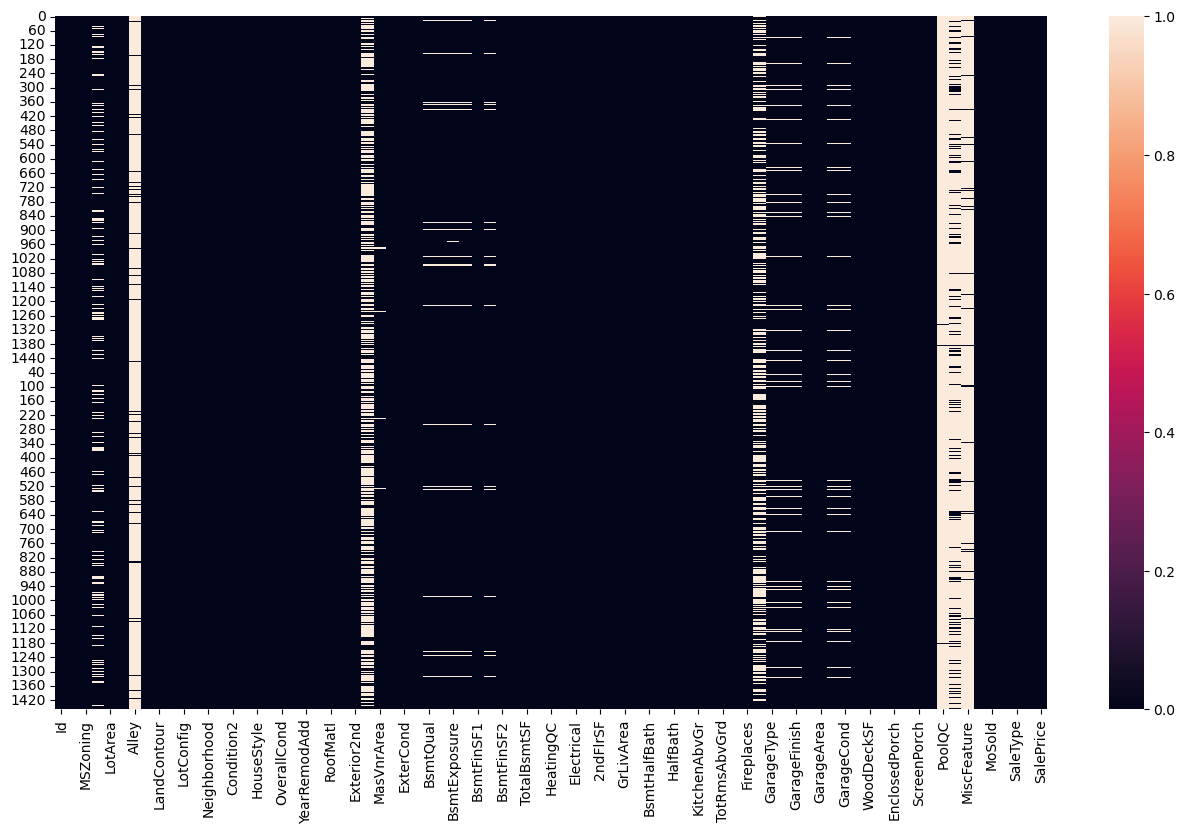

In [171]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.isnull())
plt.show()

# Get null value percentage for every feature

In [174]:
# removing Id columns which is not feature
df = df.set_index('Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [175]:
# getting null value count
null_count = df.isnull().sum()
null_count

MSSubClass         0
MSZoning           0
LotFrontage      518
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [176]:
# getting null value percentage
null_percentage = df.isnull().sum()/df.shape[0] * 100
print(null_percentage)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64


# Drop Columns / Features

In [178]:
# After reading the dataset description, we found that NA is a missing value but it is import so we don't drop any columns
# instead, we replace with some values

# Missing Value Imputation

# For MSZoning Column

In [180]:
df['MSZoning'].value_counts()

MSZoning
RL         2302
RM          436
FV          130
RH           32
C (all)      20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

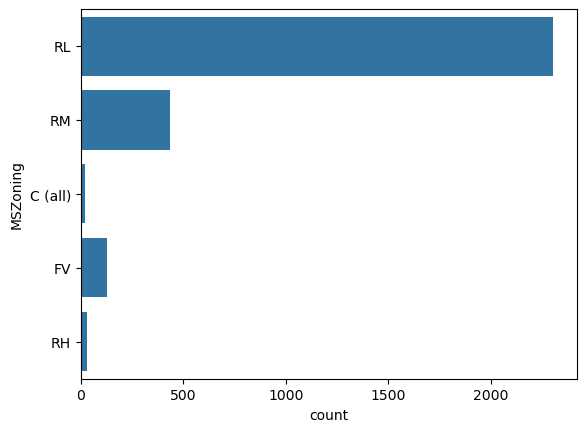

In [186]:
sns.countplot(df['MSZoning'])

In [188]:
# backup of original data
df_mvi = df.copy()

In [191]:
mszoning_mode = df['MSZoning'].mode()[0]
mszoning_mode

'RL'

In [193]:
# replacing the NA values in column MSZoning with the maximum repeated values
df_mvi['MSZoning'].replace(np.nan, mszoning_mode, inplace=True)
df_mvi['MSZoning']

C:\Users\user\AppData\Local\Temp\ipykernel_1652\866766147.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MSZoning'].replace(np.nan, mszoning_mode, inplace=True)


Id
1       RL
2       RL
3       RL
4       RL
5       RL
        ..
1456    RL
1457    RL
1458    RL
1459    RL
1460    RL
Name: MSZoning, Length: 2920, dtype: object

In [201]:
df_mvi['MSZoning'].isnull().sum()

0

<Axes: xlabel='count', ylabel='MSZoning'>

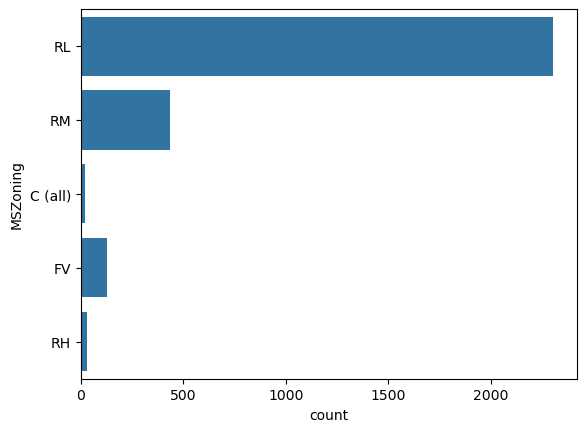

In [197]:
sns.countplot(df_mvi['MSZoning'])

# For Alley Column

In [211]:
df_mvi['Alley'].value_counts()

Alley
Grvl    100
Pave     82
Name: count, dtype: int64

In [213]:
alley_constant = 'NA'
df_mvi['Alley'].replace(np.nan, alley_constant, inplace=True)
df_mvi['Alley'].isnull().sum()

0

# For LotFrontage Column

In [224]:
def boxHistPlot(df, figsize = (16, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    plt.boxplot(df)
    plt.subplot(122)
    sns.distplot(df)

C:\Users\user\AppData\Local\Temp\ipykernel_1652\11361383.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


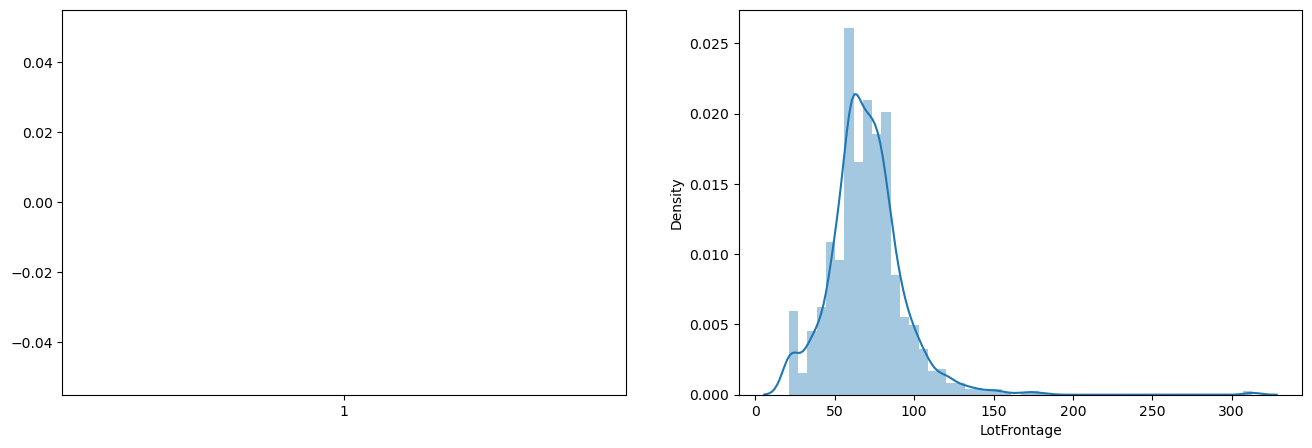

In [226]:
boxHistPlot(df['LotFrontage'])

In [232]:
lotfrontage_mean = df['LotFrontage'].mean()
lotfrontage_mean

70.04995836802665

In [234]:
df_mvi['LotFrontage'].replace(np.nan, lotfrontage_mean, inplace=True)
df_mvi['LotFrontage'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\2734220099.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['LotFrontage'].replace(np.nan, lotfrontage_mean, inplace=True)


0

# For Handling Utities Column

In [238]:
df['Utilities'].value_counts()

Utilities
AllPub    2918
NoSeWa       2
Name: count, dtype: int64

In [240]:
utilities_mode = df['Utilities'].mode()[0]
df_mvi['Utilities'].replace(np.nan, utilities_mode, inplace=True)
df_mvi['Utilities'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\701346945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Utilities'].replace(np.nan, utilities_mode, inplace=True)


0

# Handling Exterior1st and Exterior2nd Categorial features

In [256]:
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    1030
HdBoard     444
MetalSd     440
Wd Sdng     412
Plywood     216
CemntBd     122
BrkFace     100
WdShing      52
Stucco       50
AsbShng      40
BrkComm       4
Stone         4
AsphShn       2
ImStucc       2
CBlock        2
Name: count, dtype: int64

In [254]:
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    1030
HdBoard     444
MetalSd     440
Wd Sdng     412
Plywood     216
CemntBd     122
BrkFace     100
WdShing      52
Stucco       50
AsbShng      40
BrkComm       4
Stone         4
AsphShn       2
ImStucc       2
CBlock        2
Name: count, dtype: int64

In [252]:
exterior1st_mode = df['Exterior1st'].mode()[0]
exterior2nd_mode = df['Exterior2nd'].mode()[0]
df_mvi['Exterior1st'].replace(np.nan, exterior1st_mode, inplace=True)
df_mvi['Exterior2nd'].replace(np.nan, exterior2nd_mode, inplace=True)
print(df_mvi['Exterior1st'].isnull().sum())
print(df_mvi['Exterior2nd'].isnull().sum())

0
0


C:\Users\user\AppData\Local\Temp\ipykernel_1652\1201124653.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Exterior1st'].replace(np.nan, exterior1st_mode, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1652\1201124653.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

# Handling MasVnrType categorical value and MasVnrArea numerical val

<Axes: ylabel='Id'>

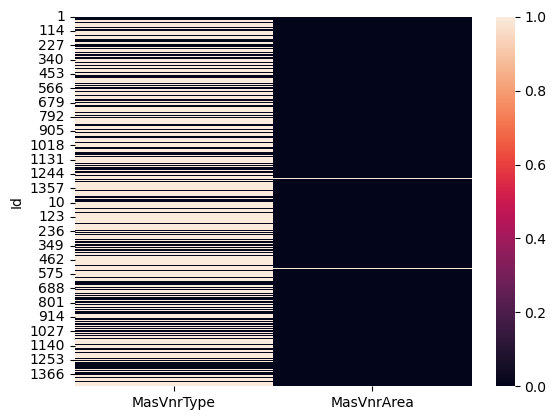

In [265]:
sns.heatmap(df[['MasVnrType', 'MasVnrArea']].isnull())

In [267]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    890
Stone      256
BrkCmn      30
Name: count, dtype: int64

In [269]:
masvnrType_mode = df['MasVnrType'].mode()[0]
df_mvi['MasVnrType'].replace(np.nan, masvnrType_mode, inplace=True)
df_mvi['MasVnrType'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\3944446410.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MasVnrType'].replace(np.nan, masvnrType_mode, inplace=True)


0

In [273]:
df['MasVnrArea'].value_counts()

MasVnrArea
0.0      1722
180.0      16
72.0       16
108.0      16
120.0      14
         ... 
562.0       2
89.0        2
921.0       2
762.0       2
119.0       2
Name: count, Length: 327, dtype: int64

In [275]:
masvnrArea = 0
df_mvi['MasVnrArea'].replace(np.nan, masvnrArea, inplace=True)
df_mvi['MasVnrArea'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\819927428.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MasVnrArea'].replace(np.nan, masvnrArea, inplace=True)


0

# Handling Basement Categorical and Numerical values

<Axes: ylabel='Id'>

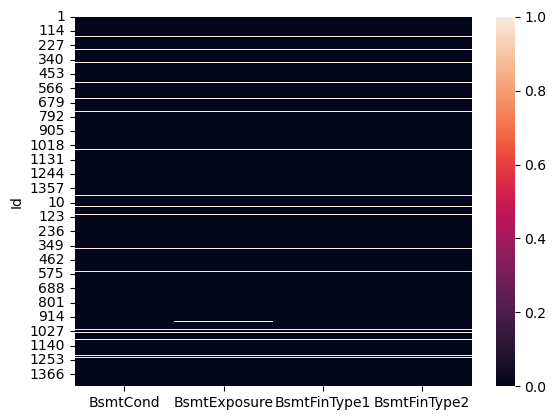

In [278]:
cat_bsmt_feature = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
sns.heatmap(df[cat_bsmt_feature].isnull())


<Axes: ylabel='Id'>

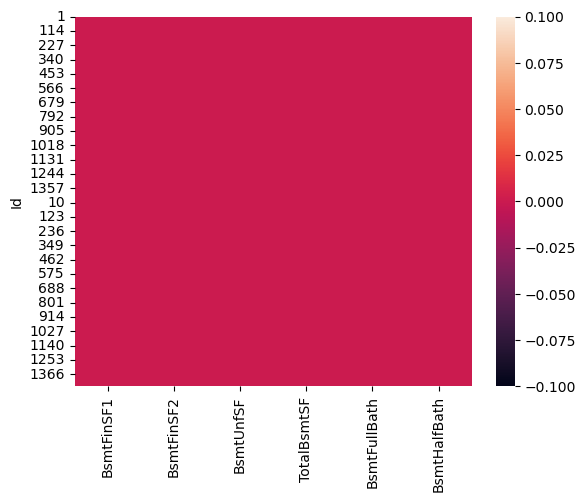

In [282]:
num_bsmt_feature = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
sns.heatmap(df[num_bsmt_feature].isnull())

In [286]:
bsmt_cont = 0
for feat in cat_bsmt_feature:
    df_mvi[feat].replace(np.nan, bsmt_cont, inplace=True)
df_mvi[cat_bsmt_feature].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\1700664965.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, bsmt_cont, inplace=True)


BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [288]:
df_bsmt = df[cat_bsmt_feature + num_bsmt_feature]
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,
18,NaN,NaN,NaN,NaN,0,0,0,0,0,0
40,NaN,NaN,NaN,NaN,0,0,0,0,0,0
91,NaN,NaN,NaN,NaN,0,0,0,0,0,0
103,NaN,NaN,NaN,NaN,0,0,0,0,0,0
157,NaN,NaN,NaN,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1217,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1219,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1233,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [292]:
bsmt_num = 0
for feat in num_bsmt_feature:
    df_mvi[feat].replace(np.nan, bsmt_num, inplace=True)
df_mvi[num_bsmt_feature].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\3003413163.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, bsmt_num, inplace=True)


BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

# Handling Electrical and KitchenQual

In [295]:
df['Electrical'].value_counts()

Electrical
SBrkr    2668
FuseA     188
FuseF      54
FuseP       6
Mix         2
Name: count, dtype: int64

In [297]:
df['KitchenQual'].value_counts()

KitchenQual
TA    1470
Gd    1172
Ex     200
Fa      78
Name: count, dtype: int64

In [306]:
df_kit = df[['Electrical', 'KitchenQual', 'KitchenAbvGr']]
df_kit[df_kit.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1380,NaN,Gd,1


In [308]:
electrical_mode = df['Electrical'].mode()[0]
df_mvi['Electrical'].replace(np.nan, electrical_mode, inplace=True)
df_mvi['Electrical'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\3555889414.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Electrical'].replace(np.nan, electrical_mode, inplace=True)


0

In [310]:
kitQual_mode = df['KitchenQual'].mode()[0]
df_mvi['KitchenQual'].replace(np.nan, kitQual_mode, inplace=True)
df_mvi['KitchenQual'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\3473216313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['KitchenQual'].replace(np.nan, kitQual_mode, inplace=True)


0

# Handling remaining categorical features

In [315]:
df['Functional'].value_counts()

Functional
Typ     2720
Min2      68
Min1      62
Mod       30
Maj1      28
Maj2      10
Sev        2
Name: count, dtype: int64

In [319]:
functional_mode = df['Functional'].mode()[0]
df_mvi['Functional'].replace(np.nan, functional_mode, inplace=True)
df_mvi['Functional'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\3491040886.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Functional'].replace(np.nan, functional_mode, inplace=True)


0

In [317]:
df['SaleType'].value_counts()

SaleType
WD       2534
New       244
COD        86
ConLD      18
ConLI      10
ConLw      10
CWD         8
Oth         6
Con         4
Name: count, dtype: int64

In [321]:
saleType_mode = df['SaleType'].mode()[0]
df_mvi['SaleType'].replace(np.nan, saleType_mode, inplace=True)
df_mvi['SaleType'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\3010379305.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['SaleType'].replace(np.nan, saleType_mode, inplace=True)


0

In [323]:
# other_cat_feature = ['FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [327]:
fireplacqu = 'NA'
df_mvi['FireplaceQu'].replace(np.nan, fireplacqu, inplace=True)
df_mvi['FireplaceQu'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\4230591581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['FireplaceQu'].replace(np.nan, fireplacqu, inplace=True)


0

In [329]:
poolqc = 'NA'
df_mvi['PoolQC'].replace(np.nan, poolqc, inplace=True)
df_mvi['PoolQC'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\2855383063.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['PoolQC'].replace(np.nan, poolqc, inplace=True)


0

In [331]:
fence = 'NA'
df_mvi['Fence'].replace(np.nan, fence, inplace=True)
df_mvi['Fence'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\1026398269.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Fence'].replace(np.nan, fence, inplace=True)


0

In [333]:
miscfeature = 'NA'
df_mvi['MiscFeature'].replace(np.nan, miscfeature, inplace=True)
df_mvi['MiscFeature'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\3987122959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MiscFeature'].replace(np.nan, miscfeature, inplace=True)


0

# Handling Garage Feature

In [342]:
num_garage_feat = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
cat_garage_feat = ['GarageYrBlt', 'GarageCars', 'GarageArea']

df_garafe = df[num_garage_feat + cat_garage_feat]
df_garafe[df_garafe.isnull().any(axis=1)]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageCars,GarageArea
Id,,,,,,,
40,NaN,NaN,NaN,NaN,NaN,0,0
49,NaN,NaN,NaN,NaN,NaN,0,0
79,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
1350,NaN,NaN,NaN,NaN,NaN,0,0
1408,NaN,NaN,NaN,NaN,NaN,0,0
1450,NaN,NaN,NaN,NaN,NaN,0,0


In [348]:
garage_cont = 'NA'
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan, garage_cont, inplace=True)

df_mvi[cat_garage_feat].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\686574253.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, garage_cont, inplace=True)


GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [350]:
garage_num = 0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan, garage_num, inplace=True)

df_mvi[num_garage_feat].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1652\1837667749.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, garage_num, inplace=True)


GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [352]:
df_mvi.isnull().any(axis=1).sum()

74

# Feature Transformation

## Convert numerical to categorical feature

In [358]:
for_num_conv = ['MSSubClass', 'YearBuilt', 'GarageYrBlt', 'MoSold', 'YrSold']
for feat in for_num_conv:
    print(f'{feat}: data type = {df_mvi[feat].dtype}')

MSSubClass: data type = int64
YearBuilt: data type = int64
GarageYrBlt: data type = object
MoSold: data type = int64
YrSold: data type = int64


In [360]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,GarageYrBlt,MoSold,YrSold
Id,,,,,
1,60,2003,2003.0,2,2008
2,20,1976,1976.0,5,2007
3,60,2001,2001.0,9,2008
4,70,1915,1998.0,2,2006
5,60,2000,2000.0,12,2008


In [362]:
df_mvi['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)